# Von Bertalanffy Growth Model

The Von Bertalanffy model describes growth where the rate of change decreases as the size approaches a maximum limit. It is commonly used to model the length or size of individual animals over time.

### 1. The Differential Equation
The model is defined by the following ODE:

$$\frac{dL}{dt} = k (L_{\infty} - L)$$

Where:
* $L(t)$ is the length/size at time $t$.
* $L_{\infty}$ is the asymptotic (maximum theoretical) length (Carrying Capacity).
* $k$ is the growth rate coefficient (how fast it approaches the max).

### 2. Analytical Solution
By integrating, the solution is:

$$L(t) = L_{\infty} - (L_{\infty} - L_0) e^{-kt}$$

Where $L_0$ is the initial size at $t=0$.

### 3. Equilibrium and Stability
* **Fixed Point:** Occurs when $\frac{dL}{dt} = 0$, which gives $L^* = L_{\infty}$.
* **Stability:** Since biological growth rates $k$ are positive, the derivative of the rate function is $-k$. Since $-k < 0$, the fixed point $L_{\infty}$ is **Stable**. All trajectories converge to the maximum size.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
def von_bertalanffy(L, t, k, L_inf):
    """
    dL/dt = k * (L_inf - L)
    """
    return k * (L_inf - L)

### Time Series Simulation

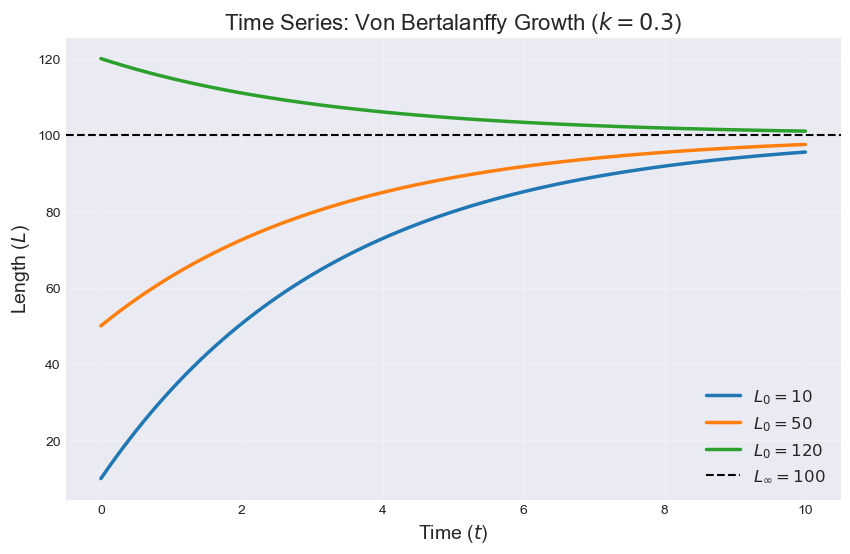

In [3]:
t = np.linspace(0, 10, 100)
L_inf = 100                         # Maximum length (cm)
k = 0.3                             # Growth coefficient
initial_conditions = [10, 50, 120]  # Starting sizes: Small, Medium, Oversized

fig, ax = plt.subplots(figsize=(10, 6))

for L0 in initial_conditions:
    L_t = odeint(von_bertalanffy, L0, t, args=(k, L_inf))
    label = f'$L_0={L0}$'
    ax.plot(t, L_t, linewidth=2.5, label=label)

ax.axhline(L_inf, color='black', linestyle='--', label=f'$L_\infty={L_inf}$')
ax.set_title(f'Time Series: Von Bertalanffy Growth ($k={k}$)', fontsize=16)
ax.set_xlabel('Time ($t$)', fontsize=14)
ax.set_ylabel('Length ($L$)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.show()

### Phase Diagram

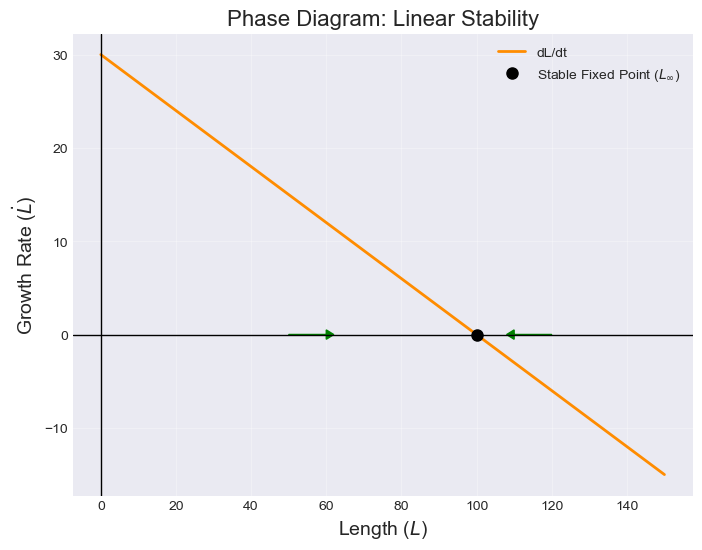

In [7]:
L_phase = np.linspace(0, 150, 100)
k_phase = 0.3
L_inf_phase = 100

dL_dt = von_bertalanffy(L_phase, 0, k_phase, L_inf_phase)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(L_phase, dL_dt, color='darkorange', linewidth=2, label='dL/dt')

ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)

ax.plot(L_inf_phase, 0, 'ko', markersize=8, label='Stable Fixed Point ($L_\infty$)')

ax.arrow(L_inf_phase/2, 0, 10, 0, head_width=1, head_length=2, fc='green', ec='green')
ax.arrow(L_inf_phase + 20, 0, -10, 0, head_width=1, head_length=2, fc='green', ec='green')

ax.set_title('Phase Diagram: Linear Stability', fontsize=16)
ax.set_xlabel('Length ($L$)', fontsize=14)
ax.set_ylabel('Growth Rate ($\\dot{L}$)', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

### Vector Field

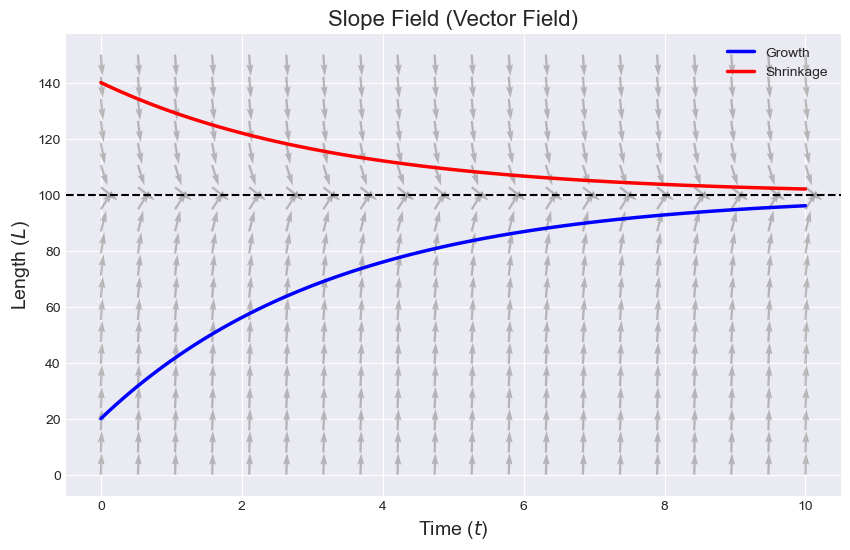

In [8]:
t_mesh = np.linspace(0, 10, 20)
L_mesh = np.linspace(0, 150, 20)
T, L_grid = np.meshgrid(t_mesh, L_mesh)

dL = von_bertalanffy(L_grid, 0, k=0.3, L_inf=100)
dT = np.ones(dL.shape)

Norm = np.sqrt(dT**2 + dL**2)
dT_norm = dT / Norm
dL_norm = dL / Norm

fig, ax = plt.subplots(figsize=(10, 6))

ax.quiver(T, L_grid, dT_norm, dL_norm, color='gray', alpha=0.5)

t_traj = np.linspace(0, 10, 100)
L_traj_1 = odeint(von_bertalanffy, y0=20, t=t_traj, args=(0.3, 100))
L_traj_2 = odeint(von_bertalanffy, y0=140, t=t_traj, args=(0.3, 100))

ax.plot(t_traj, L_traj_1, 'b-', linewidth=2.5, label='Growth')
ax.plot(t_traj, L_traj_2, 'r-', linewidth=2.5, label='Shrinkage')

ax.axhline(100, color='k', linestyle='--', linewidth=1.5)

ax.set_title('Slope Field (Vector Field)', fontsize=16)
ax.set_xlabel('Time ($t$)', fontsize=14)
ax.set_ylabel('Length ($L$)', fontsize=14)
ax.legend()

plt.show()